In [77]:
#!pip install keras cython h5py

In [78]:
#!pip install python-mnist

In [8]:
%run __init__.py

In [8]:
#docker run -it -p 8888:8888 gcr.io/tensorflow/tensorflow

In [9]:
import keras
from keras.layers import Input, Conv2D, MaxPool2D, Dropout, Activation, Dense, Flatten, AveragePooling2D
from keras.models import Sequential
from keras.activations import relu, softmax

In [79]:
from mnist import MNIST
mndata = MNIST('../python-mnist/data')
training=mndata.load_training()
testing=mndata.load_testing()


In [80]:
X_train=np.array(training[0])
y_train=np.array(training[1])

X_train.shape, y_train.shape

((60000, 784), (60000,))

In [81]:
X_test=np.array(testing[0])
y_test=np.array(testing[1])

In [82]:
X_train = X_train.reshape(60000,28,28)
X_test = X_test.reshape(10000,28,28)

In [83]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 # scaling
X_test /= 255


In [84]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)# 1 becuase we have 1 channel- because black and white
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [85]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [86]:
keras.backend

<module 'keras.backend' from '/usr/local/lib/python3.5/dist-packages/keras/backend/__init__.py'>

In [87]:
keras.backend.image_data_format()

'channels_last'

In [88]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000, 10))

In [89]:
from keras.layers import Input, Conv2D, MaxPool2D, Dropout, Activation, Dense, Flatten, AveragePooling2D
from keras.models import Sequential
from keras.activations import relu, softmax

In [90]:
mlp_LR = Sequential([
    #Dense(1, input_shape=(28,28,1), activation='relu', name = 'dense_1_mlp'),# if insteasd on 24 we put 1- we have LR
    Flatten(input_shape=(28,28,1), name= "flatten_1_mlp"),
    #Dense(16, activation='relu', name = 'dense_2_mlp'),# we add another layer
    #Dropout(0.1),# we regularize
    Dense(10, activation='softmax')
])

In [91]:
mlp_LR.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1_mlp (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [92]:
mlp_LR.compile(optimizer=keras.optimizers.SGD(), 
           loss=keras.losses.categorical_crossentropy,
           metrics=['accuracy'])

In [93]:
mlp_LR_history=mlp_LR.fit(X_train, y_train, validation_split=.2, epochs=60)

Train on 48000 samples, validate on 12000 samples
Epoch 1/60
48000/48000 [==============================] - 4s 79us/step - loss: 0.8609 - acc: 0.7913 - val_loss: 0.5121 - val_acc: 0.8778
Epoch 2/60
48000/48000 [==============================] - 3s 60us/step - loss: 0.4915 - acc: 0.8740 - val_loss: 0.4197 - val_acc: 0.8914
Epoch 3/60
48000/48000 [==============================] - 3s 57us/step - loss: 0.4292 - acc: 0.8859 - val_loss: 0.3833 - val_acc: 0.8996
Epoch 4/60
48000/48000 [==============================] - 3s 70us/step - loss: 0.3984 - acc: 0.8920 - val_loss: 0.3632 - val_acc: 0.9031
Epoch 5/60
48000/48000 [==============================] - 3s 73us/step - loss: 0.3790 - acc: 0.8964 - val_loss: 0.3490 - val_acc: 0.9066
Epoch 6/60
48000/48000 [==============================] - 3s 69us/step - loss: 0.3654 - acc: 0.8988 - val_loss: 0.3393 - val_acc: 0.9077
Epoch 7/60
48000/48000 [==============================] - 3s 58us/step - loss: 0.3552 - acc: 0.9010 - val_loss: 0.3315 - val_acc

48000/48000 [==============================] - 3s 60us/step - loss: 0.2730 - acc: 0.9240 - val_loss: 0.2736 - val_acc: 0.9241


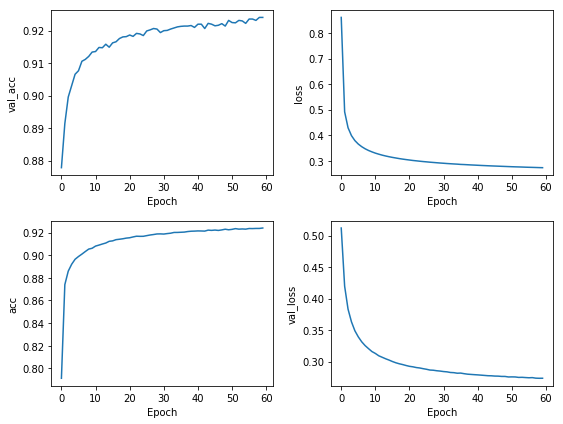

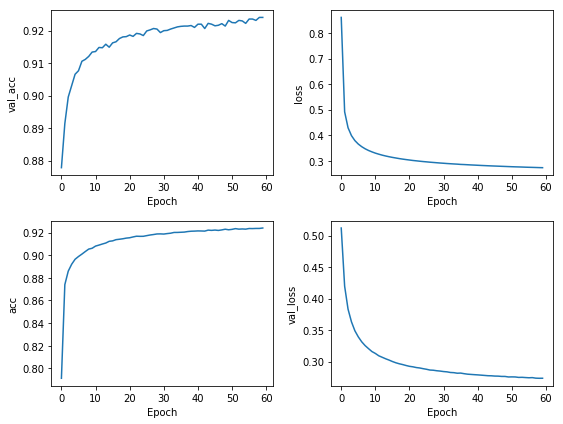

In [95]:
fig = plt.figure(figsize=(8,6))
for i, (title, data) in enumerate(mlp_LR_history.history.items()):
    fig.add_subplot(2,2,1+i)
    plt.plot(data)
    plt.xlabel('Epoch')
    plt.ylabel(title)
plt.tight_layout()
plt.show()

In [96]:
mlp = Sequential([
    Dense(300, input_shape=(28,28,1), activation='relu', name = 'dense_1_mlp'),# if insteasd on 24 we put 1- we have LR
    Flatten(name= "flatten_1_mlp"),
    #Dense(16, activation='relu', name = 'dense_2_mlp'),# we add another layer
    #Dropout(0.1),# we regularize
    Dense(10, activation='softmax')
])

In [97]:
mlp.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1_mlp (Dense)          (None, 28, 28, 300)       600       
_________________________________________________________________
flatten_1_mlp (Flatten)      (None, 235200)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2352010   
Total params: 2,352,610
Trainable params: 2,352,610
Non-trainable params: 0
_________________________________________________________________


In [98]:
mlp.compile(optimizer=keras.optimizers.SGD(),
           loss=keras.losses.categorical_crossentropy,
           metrics=['accuracy'])

In [99]:
mlp_history=mlp.fit(X_train, y_train, validation_split=.2, epochs=10)


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 264s 6ms/step - loss: 0.5671 - acc: 0.8603 - val_loss: 0.3289 - val_acc: 0.9083
Epoch 2/10
48000/48000 [==============================] - 253s 5ms/step - loss: 0.3286 - acc: 0.9062 - val_loss: 0.2953 - val_acc: 0.9169
Epoch 3/10
48000/48000 [==============================] - 248s 5ms/step - loss: 0.3065 - acc: 0.9126 - val_loss: 0.2873 - val_acc: 0.9187
Epoch 4/10
48000/48000 [==============================] - 252s 5ms/step - loss: 0.2953 - acc: 0.9163 - val_loss: 0.2803 - val_acc: 0.9208
Epoch 5/10
48000/48000 [==============================] - 258s 5ms/step - loss: 0.2884 - acc: 0.9188 - val_loss: 0.2800 - val_acc: 0.9214
Epoch 6/10
48000/48000 [==============================] - 259s 5ms/step - loss: 0.2831 - acc: 0.9209 - val_loss: 0.2767 - val_acc: 0.9245
Epoch 7/10
48000/48000 [==============================] - 272s 6ms/step - loss: 0.2791 - acc: 0.9212 - val_loss: 0.2779 - 

In [100]:
mlp_history.history


{'acc': [0.86027083333333332,
  0.90618750000000003,
  0.9125833333333333,
  0.91631249999999997,
  0.91883333333333328,
  0.920875,
  0.92116666666666669,
  0.92200000000000004,
  0.92281250000000004,
  0.92385416666666664],
 'loss': [0.56707807804147403,
  0.32863580958048505,
  0.30649451321363447,
  0.2952849679638942,
  0.28842373922963938,
  0.28313791798055171,
  0.27914665670692923,
  0.27638425038506587,
  0.27375101561968523,
  0.27076886443545423],
 'val_acc': [0.90833333333333333,
  0.91691666666666671,
  0.91874999999999996,
  0.92083333333333328,
  0.92141666666666666,
  0.92449999999999999,
  0.92191666666666672,
  0.92425000000000002,
  0.92549999999999999,
  0.92433333333333334],
 'val_loss': [0.32892116092642149,
  0.29528474801778792,
  0.28730327527225019,
  0.28033198514084023,
  0.28000757344067095,
  0.27672450104355811,
  0.27792294385035832,
  0.27612513028085234,
  0.27416076741119227,
  0.27938581442336241]}

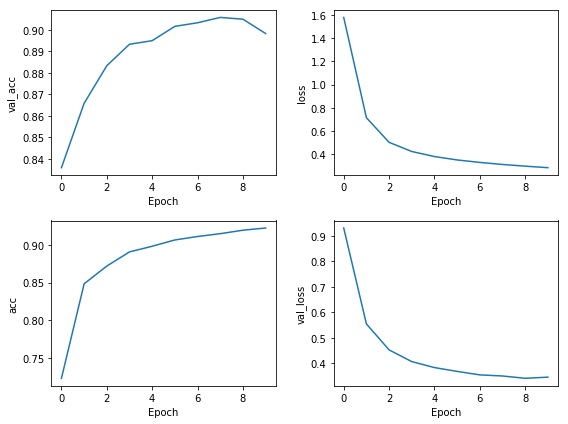

In [126]:
fig = plt.figure(figsize=(8,6))
for i, (title, data) in enumerate(mlp_history.history.items()):
    fig.add_subplot(2,2,1+i)
    plt.plot(data)
    plt.xlabel('Epoch')
    plt.ylabel(title)
plt.tight_layout()
plt.show()

In [102]:
mlp = Sequential([
    Dense(1000, input_shape=(28,28,1), activation='relu', name = 'dense_1_mlp'),
    Flatten(name= "flatten_1_mlp"),
    Dense(10, activation='softmax')
])

In [103]:
mlp.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1_mlp (Dense)          (None, 28, 28, 1000)      2000      
_________________________________________________________________
flatten_1_mlp (Flatten)      (None, 784000)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                7840010   
Total params: 7,842,010
Trainable params: 7,842,010
Non-trainable params: 0
_________________________________________________________________


In [104]:
mlp.compile(optimizer=keras.optimizers.SGD(),
           loss=keras.losses.categorical_crossentropy,
           metrics=['accuracy'])

In [105]:
idx = np.random.choice(np.arange(len(X_train)), 6000, replace=False)
X_s = X_train[idx]
y_s = y_train[idx]

In [106]:
mlp_history=mlp.fit(X_s, y_s, validation_split=.2, epochs=10, )# batchsize=16,8, 4??? generattors? fit. geberator???


Train on 4800 samples, validate on 1200 samples
Epoch 1/10
4800/4800 [==============================] - 116s 24ms/step - loss: 1.5772 - acc: 0.7231 - val_loss: 0.9308 - val_acc: 0.8358
Epoch 2/10
4800/4800 [==============================] - 110s 23ms/step - loss: 0.7161 - acc: 0.8483 - val_loss: 0.5547 - val_acc: 0.8658
Epoch 3/10
4800/4800 [==============================] - 105s 22ms/step - loss: 0.5045 - acc: 0.8719 - val_loss: 0.4529 - val_acc: 0.8833
Epoch 4/10
4800/4800 [==============================] - 107s 22ms/step - loss: 0.4257 - acc: 0.8906 - val_loss: 0.4069 - val_acc: 0.8933
Epoch 5/10
4800/4800 [==============================] - 110s 23ms/step - loss: 0.3825 - acc: 0.8981 - val_loss: 0.3835 - val_acc: 0.8950
Epoch 6/10
4800/4800 [==============================] - 108s 23ms/step - loss: 0.3532 - acc: 0.9065 - val_loss: 0.3685 - val_acc: 0.9017
Epoch 7/10
4800/4800 [==============================] - 126s 26ms/step - loss: 0.3321 - acc: 0.9110 - val_loss: 0.3548 - val_acc: 

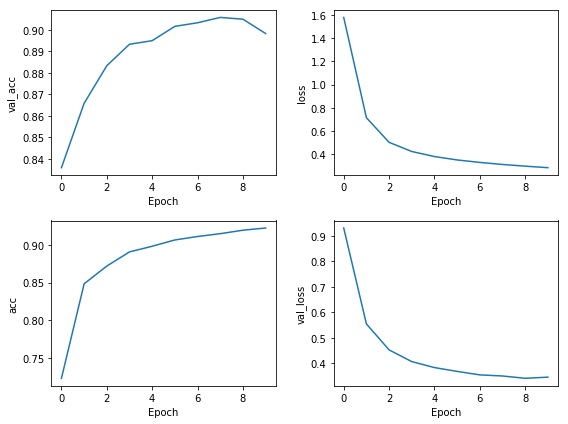

In [125]:

fig = plt.figure(figsize=(8,6))
for i, (title, data) in enumerate(mlp_history.history.items()):
    fig.add_subplot(2,2,1+i)
    plt.plot(data)
    plt.xlabel('Epoch')
    plt.ylabel(title)
plt.tight_layout()
plt.show()

In [108]:
mlp_2 = Sequential([
    Dense(300, input_shape=(28,28,1), activation='relu', name = 'dense_1_mlp'),
    Flatten(name= "flatten_1_mlp"),
    Dense(100, activation='relu', name = 'dense_2_mlp'),
    Dense(10, activation='softmax')
])
mlp_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1_mlp (Dense)          (None, 28, 28, 300)       600       
_________________________________________________________________
flatten_1_mlp (Flatten)      (None, 235200)            0         
_________________________________________________________________
dense_2_mlp (Dense)          (None, 100)               23520100  
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 23,521,710
Trainable params: 23,521,710
Non-trainable params: 0
_________________________________________________________________


In [109]:
mlp_2.compile(optimizer=keras.optimizers.SGD(),
           loss=keras.losses.categorical_crossentropy,
           metrics=['accuracy'])

In [110]:
mlp_2_history=mlp.fit(X_s, y_s, validation_split=.2, epochs=10)

Train on 4800 samples, validate on 1200 samples
Epoch 1/10
4800/4800 [==============================] - 104s 22ms/step - loss: 0.2762 - acc: 0.9248 - val_loss: 0.3353 - val_acc: 0.9100
Epoch 2/10
4800/4800 [==============================] - 104s 22ms/step - loss: 0.2669 - acc: 0.9265 - val_loss: 0.3332 - val_acc: 0.9108
Epoch 3/10
4800/4800 [==============================] - 102s 21ms/step - loss: 0.2581 - acc: 0.9306 - val_loss: 0.3320 - val_acc: 0.9092
Epoch 4/10
4800/4800 [==============================] - 102s 21ms/step - loss: 0.2508 - acc: 0.9304 - val_loss: 0.3315 - val_acc: 0.9067
Epoch 5/10
4800/4800 [==============================] - 103s 21ms/step - loss: 0.2435 - acc: 0.9354 - val_loss: 0.3245 - val_acc: 0.9142
Epoch 6/10
4800/4800 [==============================] - 103s 21ms/step - loss: 0.2369 - acc: 0.9369 - val_loss: 0.3314 - val_acc: 0.9117
Epoch 7/10
4800/4800 [==============================] - 104s 22ms/step - loss: 0.2319 - acc: 0.9381 - val_loss: 0.3242 - val_acc: 

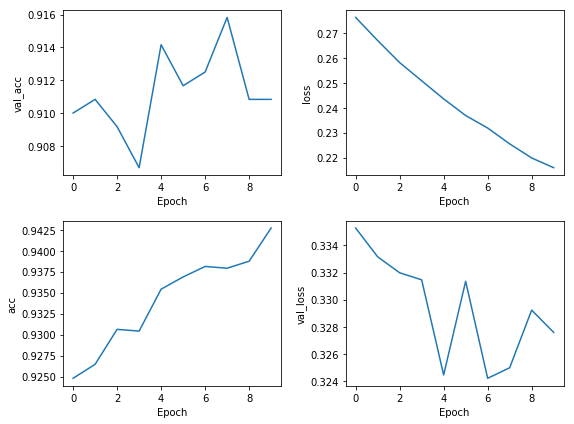

In [124]:

fig = plt.figure(figsize=(8,6))
for i, (title, data) in enumerate(mlp_2_history.history.items()):
    fig.add_subplot(2,2,1+i)
    plt.plot(data)
    plt.xlabel('Epoch')
    plt.ylabel(title)
plt.tight_layout()
plt.show()

In [113]:
mlp_3 = Sequential([
    Dense(500, input_shape=(28,28,1), activation='relu', name = 'dense_1_mlp'),
    Flatten(name= "flatten_1_mlp"),
    Dense(150, activation='relu', name = 'dense_2_mlp'),
    Dense(10, activation='softmax')
])
mlp_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1_mlp (Dense)          (None, 28, 28, 500)       1000      
_________________________________________________________________
flatten_1_mlp (Flatten)      (None, 392000)            0         
_________________________________________________________________
dense_2_mlp (Dense)          (None, 150)               58800150  
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1510      
Total params: 58,802,660
Trainable params: 58,802,660
Non-trainable params: 0
_________________________________________________________________


In [114]:
mlp_3.compile(optimizer=keras.optimizers.SGD(),
           loss=keras.losses.categorical_crossentropy,
           metrics=['accuracy'])
mlp_3_history=mlp.fit(X_s, y_s, validation_split=.2, epochs=10)

Train on 4800 samples, validate on 1200 samples
Epoch 1/10
4800/4800 [==============================] - 110s 23ms/step - loss: 0.2111 - acc: 0.9413 - val_loss: 0.3298 - val_acc: 0.9142
Epoch 2/10
4800/4800 [==============================] - 107s 22ms/step - loss: 0.2056 - acc: 0.9448 - val_loss: 0.3222 - val_acc: 0.9167
Epoch 3/10
4800/4800 [==============================] - 129s 27ms/step - loss: 0.2006 - acc: 0.9469 - val_loss: 0.3347 - val_acc: 0.9067
Epoch 4/10
4800/4800 [==============================] - 115s 24ms/step - loss: 0.1979 - acc: 0.9448 - val_loss: 0.3282 - val_acc: 0.9150
Epoch 5/10
4800/4800 [==============================] - 108s 22ms/step - loss: 0.1943 - acc: 0.9460 - val_loss: 0.3263 - val_acc: 0.9158
Epoch 6/10
4800/4800 [==============================] - 110s 23ms/step - loss: 0.1921 - acc: 0.9485 - val_loss: 0.3279 - val_acc: 0.9150
Epoch 7/10
4800/4800 [==============================] - 125s 26ms/step - loss: 0.1873 - acc: 0.9496 - val_loss: 0.3318 - val_acc: 

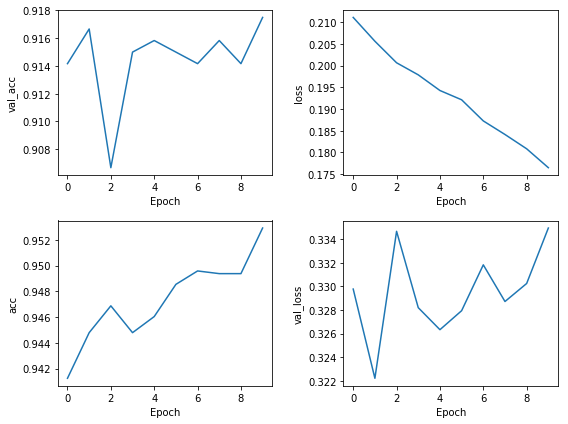

In [123]:
fig = plt.figure(figsize=(8,6))
for i, (title, data) in enumerate(mlp_3_history.history.items()):
    fig.add_subplot(2,2,1+i)
    plt.plot(data)
    plt.xlabel('Epoch')
    plt.ylabel(title)
plt.tight_layout()
plt.show()

In [116]:
cnn = Sequential([
    Conv2D(20, kernel_size=(5, 5), strides=(2,2),
                 activation='relu',
                 input_shape=(28,28,1),
                 padding='same'),
    #Conv2D(16, (3, 3), activation='relu'),
    #Dropout(.25),#regularize
    #MaxPool2D(),
    Flatten(),
    #Dense(64, activation='relu'),
    #Dropout(.25),#regularize
    Dense(10, activation='softmax')
])

cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 20)        520       
_________________________________________________________________
flatten_1 (Flatten)          (None, 3920)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                39210     
Total params: 39,730
Trainable params: 39,730
Non-trainable params: 0
_________________________________________________________________


In [117]:
cnn.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [118]:
from keras.callbacks import TensorBoard, EarlyStopping

In [119]:
tb = TensorBoard(log_dir='./tf_logs/cnn/')
es=EarlyStopping(patience=0)

In [120]:
cnn_history = cnn.fit(X_train, y_train, validation_split=.3, epochs=10, callbacks=[tb,es])# when we ran it again, we continue fitting

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 10s 227us/step - loss: 0.3935 - acc: 0.8911 - val_loss: 0.2683 - val_acc: 0.9233
Epoch 2/10
42000/42000 [==============================] - 10s 229us/step - loss: 0.2395 - acc: 0.9317 - val_loss: 0.2203 - val_acc: 0.9388
Epoch 3/10
42000/42000 [==============================] - 9s 221us/step - loss: 0.1916 - acc: 0.9462 - val_loss: 0.1845 - val_acc: 0.9483
Epoch 4/10
42000/42000 [==============================] - 10s 241us/step - loss: 0.1563 - acc: 0.9567 - val_loss: 0.1526 - val_acc: 0.9576
Epoch 5/10
42000/42000 [==============================] - 10s 248us/step - loss: 0.1316 - acc: 0.9625 - val_loss: 0.1314 - val_acc: 0.9628
Epoch 6/10
42000/42000 [==============================] - 10s 249us/step - loss: 0.1136 - acc: 0.9685 - val_loss: 0.1197 - val_acc: 0.9672
Epoch 7/10
42000/42000 [==============================] - 10s 239us/step - loss: 0.1010 - acc: 0.9718 - val_loss: 0.1

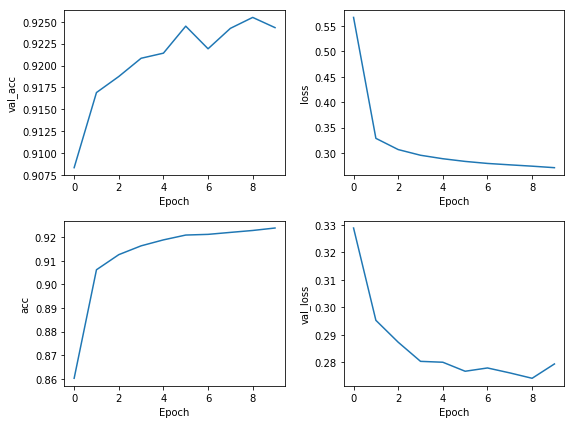

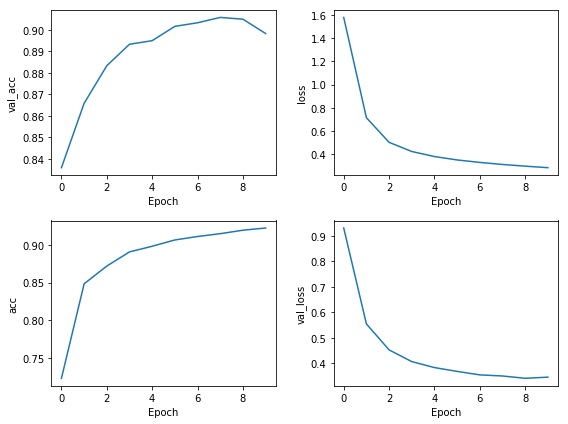

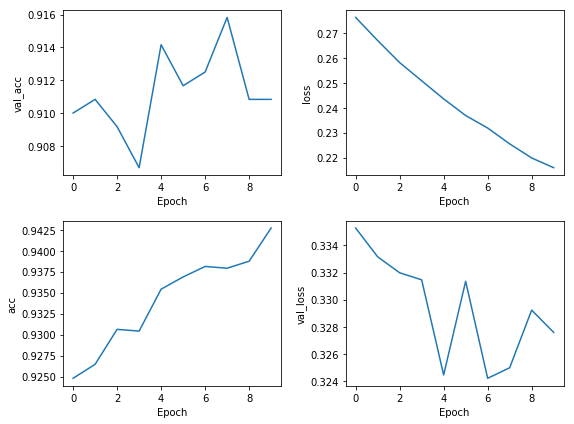

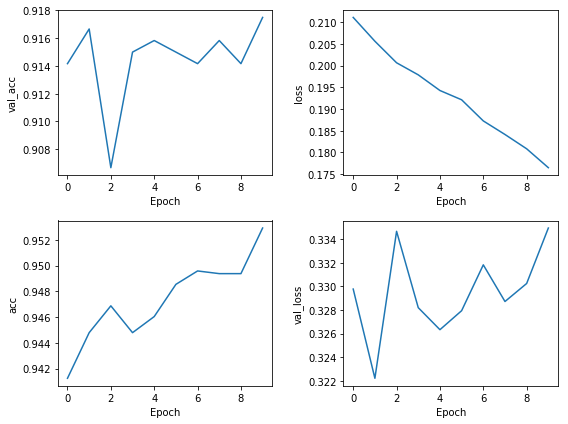

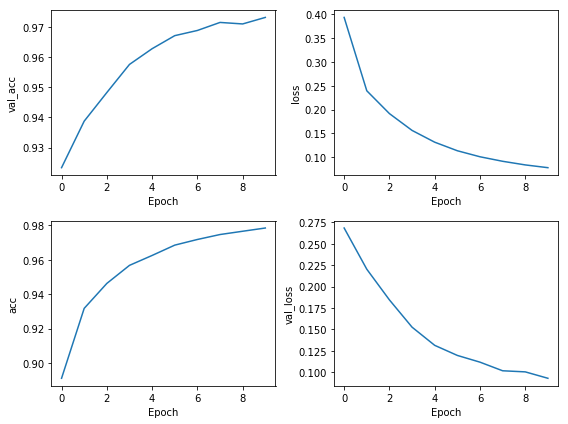

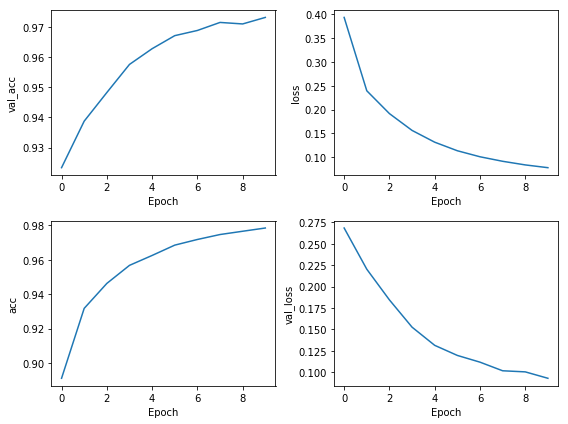

In [122]:
fig = plt.figure(figsize=(8,6))
for i, (title, data) in enumerate(cnn_history.history.items()):
    fig.add_subplot(2,2,1+i)
    plt.plot(data)
    plt.xlabel('Epoch')
    plt.ylabel(title)
plt.tight_layout()
plt.show()

In [ ]:
#cnn_1 = Sequential([
#    Conv2D(6, kernel_size=(5, 5), strides=(2,2),
#                 activation='relu',
#                 input_shape=(28,28,1),
#                 padding='same'),
#    MaxPool2D(),
#    Conv2D(16, (3, 3), activation='relu'),
#    #Dropout(.25),#regularize
#    MaxPool2D(),
#    Flatten(),
#    Dense(120, activation='relu'),
#    #Dropout(.25),#regularize
#    Dense(10, activation='softmax')
#])
#cnn_2 = Sequential([
#    Conv2D(6, kernel_size=(5, 5), 
#                 activation='relu',
#                 input_shape=(28,28,1),
#                 padding='same'),
#    AveragePooling2D(),
#    Conv2D(16, (5, 5), activation='relu'),
#    AveragePooling2D(),
#    Conv2D(120, (5,5), activation='relu'),
#    Flatten(),
#    Dense(10, activation='softmax')
#])